필터링
  - 원하는 조건에 맞는 데이터만 추출
  - 조건에 맞는 경우를 true / false로 구분하고 해당 row만 추출

In [13]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
# 나이가 10대인 승객만 추출(10~19)
mask1 = (titanic['age'] >= 10) & (titanic['age'] < 20 )
df_teenage = titanic.loc[mask1,:]
df_teenage.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [16]:
# 나이가 10세미만(0~9) 이고 여성인 승객만 추출
mask2 = (titanic.age<10) & (titanic.sex =='female')
df_female_under10 =  titanic.loc[mask2, :]
df_female_under10.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [24]:
# 나이가 10세 미만 또는 60세 이상인 승객의 age, sex ,alone 열만 선택
mask3 = (titanic.age < 10) | (titanic.age >=60)
df_under10_morethan60 = titanic.loc[mask3, ['age','sex','alone'] ]
df_under10_morethan60.head()

,age,sex,alone
7,2.0,male,False
10,4.0,female,False
16,2.0,male,False
24,8.0,female,False
33,66.0,male,True


isin() 메소드 활용

In [ ]:
# 함께탑승한 형제 또는 배우자의 수가 3 4 5인 승객만 따로 추출
mask3 = titanic.sibsp == 3
mask4 = titanic.sibsp == 4
mask5 = titanic.sibsp == 5
df_boolean = titanic.loc[mask3|mask4|mask5, :]
df_boolean

In [ ]:
maskisin = titanic.sibsp.isin([3,4,5])
def_isin = titanic.loc[maskisin, : ]
def_isin

데이터 프레임 병합 merge
  - sql의 join과 비슷
  - concat은 단순히 연결
  - merge 키가되는 컬럼을 기준으로 같은 row끼리 묶는작업

In [31]:
import pandas as pd

In [32]:
df1 = pd.read_excel('/content/stock price.xlsx')
df2 = pd.read_excel('/content/stock valuation.xlsx')
print(df1.head())
print('\n')
print(df2.head())

       id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200


       id     name           eps     bps        per       pbr
0  130960   CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480       하림    274.166667    3551  11.489362  0.887074
2  138040  메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480      이마트  18268.166667  295780  13.931338  0.860437
4  145990      삼양사   5741.000000  108090  14.283226  0.758627


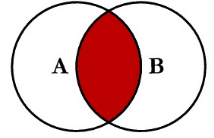

In [33]:
pd.merge(df1,df2,how='inner')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


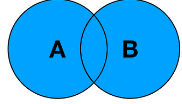

In [34]:
pd.merge(df1,df2,how='outer',on='id')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


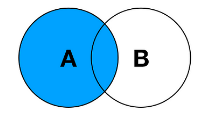

In [38]:
pd.merge(df1,df2,how='left', left_on='stock_name', right_on='name')

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,145990.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,185750.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,204210.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


그룹연산
  - 1. 분할(split) : 데이터를 특정 조건에 의해 분할
  - 2. 적용(apply) : 데이터를 집계, 변환, 필터링하는데 필요한 메소드 적용
  - 3. 결합(combine) : 2단계의 처리 결과를 하나로 결합

In [39]:
# 1 groupby

In [42]:
df = titanic.loc[:, ['age','sex','class','fare','survived']]
print('승객수 : ',  len(df) )
print('\n')
grouped = df.groupby(['class'])
print(grouped)

승객수 :  891




In [43]:
for key,group in grouped:
  print('key : ',key)
  print('number : ',len(group))
  print(group.head())
  print('\n')

key :  First
number :  216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


key :  Second
number :  184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


key :  Third
number :  491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




<ipython-input-43-3952c4654bba>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key,group in grouped:


In [44]:
grouped.mean()

<ipython-input-44-eca914d15133>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.mean()


,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


여러 열을 가지고 그룹화

In [45]:
grouped_two = df.groupby(['class','sex'])
for key,group in grouped_two:
  print('key : ', key)
  print('number : ', len(group))
  print(group.head())

key :  ('First', 'female')
number :  94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
key :  ('First', 'male')
number :  122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0
key :  ('Second', 'female')
number :  76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1
key :  ('Second', 'male')
number :  108
     age   sex   class  fare  survived
17   NaN  male  Secon

In [46]:
grouped_two.mean()

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

적용-결합 단계

In [49]:
# df  class별로 그룹화
# 표준편차 적용
# 각 그룹에대한 fare열의 표준편차
grouped = df.groupby(['class'])
std_all = grouped.std()
std_fare = grouped.fare.std()
print(std_all)
print()
print(std_fare)

              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


<ipython-input-49-1fbe45b6d945>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_all = grouped.std()


사용자 정의 함수를 집계함수로 사용
  - agg(매핑함수)

In [50]:
def min_max(x):
  return x.max() - x.min()
# 각 그룹에 최대값과 최소값의 차이를 계산해서 그룹별로 집계
grouped.agg(min_max)

<ipython-input-50-9421e345647d>:4: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(min_max)


,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


In [60]:
#여러개의 집계함수를 적용할 수 있음
# 모든 집계형 컬럼에 동일한 집계합수를 적용
grouped.agg([min,max,min_max])

<ipython-input-60-aaa5bd15c0d8>:2: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg([min,max,min_max])


age               fare                     survived            
         min   max min_max  min       max   min_max      min max min_max
class                                                                   
First   0.92  80.0   79.08  0.0  512.3292  512.3292        0   1       1
Second  0.67  70.0   69.33  0.0   73.5000   73.5000        0   1       1
Third   0.42  74.0   73.58  0.0   69.5500   69.5500        0   1       1

In [62]:
# 집계형 컬럼별로 각기 다른 집계합수를 적용
grouped.agg(
    {
        'age': min_max, #사용자 정의 함수는 시스템에 내장되지 않으므로 그냥쓰고
        'fare' : 'mean', # 내장 함수는 문자열 표현
        'survived' : 'std'
     }
    )

,age,fare,survived
class,,,
First,79.08,84.154687,0.484026
Second,69.33,20.662183,0.500623
Third,73.58,13.675550,0.428949


데이터 변환
  - transeform(매핑함수)

In [ ]:
# z-score : (x - x.mean) / x.std

In [71]:
# age에 대해서 z-score 구해봅시다
grouped = df.loc[:, ['age','fare','survived','class']].groupby(['class'])
age_mean = grouped.age.mean()
print(age_mean)
# 그룹별 age의 표준편차
age_std = grouped.age.std()
print(age_std)

for key,group in grouped.age:
  group_zscore = (group-age_mean.loc[key]) / age_std.loc[key]
  print('orgin : ',key)
  print(group_zscore.head(2))
  print()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64
class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64
orgin :  First
1   -0.015770
3   -0.218434
Name: age, dtype: float64

orgin :  Second
9    -1.134029
15    1.794317
Name: age, dtype: float64

orgin :  Third
0   -0.251342
2    0.068776
Name: age, dtype: float64



위의 방법을 개선

In [72]:
def z_score(x):
  return (x-x.mean()) / x.std()
age_zscore = grouped.age.transform(z_score)
age_zscore

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64